In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Definir o número de itens
num_items = 100

# Gerar dados aleatórios para pesos e valores de utilidade
np.random.seed(42)  # Define a semente para reprodução
capacity = np.random.randint(10, 100, num_items)  # Pesos de 10 a 100
utility  = np.random.randint(10, 100, num_items)  # Valores de 10 a 100

# Definir a capacidade da mochila
max_capacity = 2500

# Criar um conjunto de dados 
dataset = {'num_items'   : num_items,
           'capacity'    : capacity,
           'utility'     : utility,
           'max_capacity': max_capacity}

print("Número de itens:", dataset['num_items'])
print("Pesos dos itens:", dataset['capacity'])
print("Utilidade dos itens:", dataset['utility'])
print("Capacidade da mochila:", dataset['max_capacity'])


Número de itens: 100
Pesos dos itens: [61 24 81 70 30 92 96 84 84 97 33 12 31 62 11 97 39 47 11 73 69 30 42 85
 67 31 98 58 68 51 69 89 24 71 71 56 71 60 64 73 12 60 16 30 82 48 27 13
 98 69 23 18 99 62 11 93 69 80 53 17 56 44 87 90 45 59 13 11 15 63 13 63
 72 27 99 53 43 83 71 23 57 24 81 87 96 71 49 94 89 91 62 33 35 98 69 50
 38 24 54 74]
Utilidade dos itens: [98 80 18 97 10 17 97 72 20 90 17 44 44 42 14 50 37 16 82 81 21 43 42 57
 32 71 97 46 53 95 44 74 56 87 12 10 14 99 23 36 18 88 24 99 51 86 60 72
 61 13 32 24 52 38 45 22 41 80 68 95 37 75 51 54 71 66 15 37 37 53 93 39
 71 84 98 71 10 36 71 86 12 79 81 36 18 71 46 60 53 33 88 68 41 97 61 71
 67 61 21 48]
Capacidade da mochila: 2500


In [98]:
random_choice = np.random.choice([0,1],100)

def objective_function(utility, capacity, max_capacity, random_choice):
    total_utility = np.dot(utility, random_choice)
    total_capacity = np.dot(capacity, random_choice)
    if total_capacity <= max_capacity:
        return total_utility
    else:
        return 0

print(f'Dados iniciais: {random_choice}')
print(f'Iniciando com os seguintes itens aleatórios: {sum(random_choice)}')
result = objective_function(utility, capacity, max_capacity, random_choice)
print(f'Com utilidade total: {result}')

Dados iniciais: [1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0]
Iniciando com os seguintes itens aleatórios: 42
Com utilidade total: 2359


In [99]:
def create_neighbor(random_choice):
    # Gerar um vizinho escolhendo um item aleatório para adicionar/remover
    neighbor = random_choice.copy()
    flip_index = np.random.randint(len(random_choice))
    neighbor[flip_index] = 1 - neighbor[flip_index]
    return neighbor

print(f'vizinho da escolha inicial: {create_neighbor(random_choice)}')


vizinho da escolha inicial: [1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0]


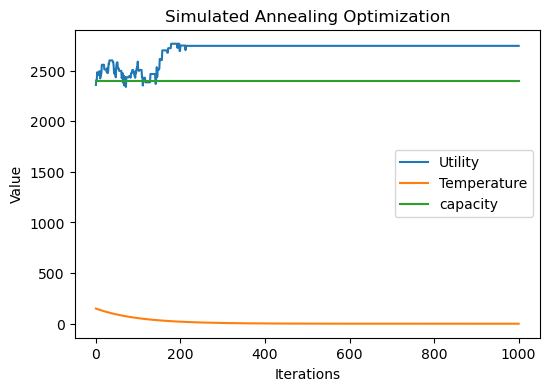

Solução Inicial: 42
Solução Final: 48
Valor Final: 2745
Capacidade total final: 2396


In [100]:
def simulated_annealing(random_choice, utility, capacity, max_capacity, initial_temperature, cooling_rate, iterations):
        
    current_solution = random_choice
    current_utility = objective_function(utility, capacity, max_capacity, current_solution)
    current_capacity = np.dot(capacity,current_solution)
    
    utility_values = [current_utility]
    temperature_values = [initial_temperature]
    capacity_values = [current_capacity]
    
    for i in range(iterations):
        neighbor_solution = create_neighbor(current_solution)
        neighbor_utility = objective_function(utility, capacity, max_capacity, neighbor_solution)
         
        # Aceita o vizinho se ele é melhor ou de acordo com a probabilidade de Boltzmann
        if neighbor_utility > current_utility or np.random.rand() < np.exp((neighbor_utility - current_utility) / initial_temperature):
            current_solution = neighbor_solution
            current_utility = neighbor_utility

        #current_temperature = initial_temperature * cooling_rate    
        initial_temperature *= cooling_rate
        initial_temperature = max(initial_temperature, 0.1)

        utility_values.append(current_utility)
        temperature_values.append(initial_temperature)
        capacity_values.append(current_capacity)

    plt.figure(figsize=(6, 4))
    plt.plot(utility_values, label='Utility')
    plt.plot(temperature_values, label='Temperature')
    plt.plot(capacity_values, label='capacity')
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.title('Simulated Annealing Optimization')
    plt.show()

    return current_solution, current_utility, current_capacity

# Use o conjunto de dados criado anteriormente
utility = dataset['utility']
capacity = dataset['capacity']
max_capacity = dataset['max_capacity']

# Parâmetros do Simulated Annealing
initial_temperature = 150
cooling_rate = 0.99
iterations = 1000

# Executa o Simulated Annealing
final_solution, final_value, final_capacity = simulated_annealing(random_choice, utility, capacity, max_capacity, initial_temperature, cooling_rate, iterations)

print("Solução Inicial:", sum(random_choice))
print("Solução Final:", sum(final_solution))
print("Valor Final:", final_value)
print("Capacidade total final:", final_capacity)